# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

           x          y  comment_class
0  37.612416  55.777454             -1
1  37.612416  55.777454             -1
2  37.603298  55.742108             -1
3  37.558526  55.728758             -1
4  37.566431  55.731794             -1
размерность матрицы всех координат (108806, 2)
размерность матрицы проголосовавших ЗА (13659, 2)
размерность матрицы проголосовавших ПРОТИВ (95147, 2)


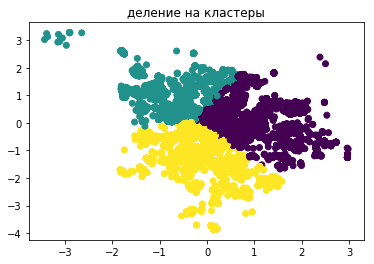

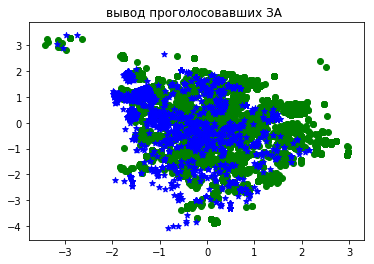

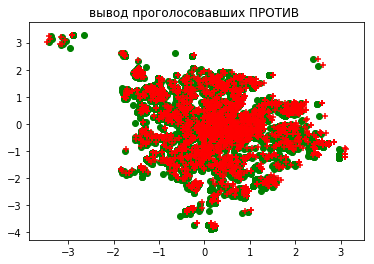

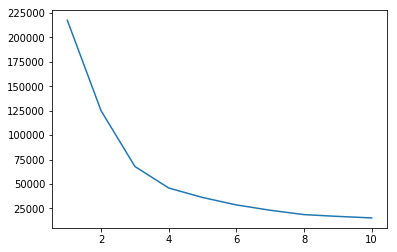

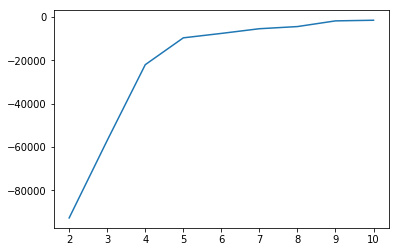

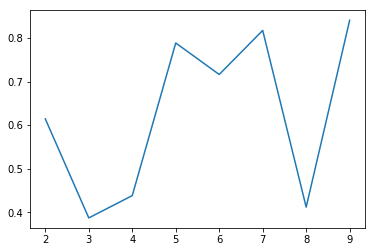

3

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

scaler = StandardScaler()

raw_data = pd.read_excel('geo.xlsx')
data = raw_data.iloc[:, :]
                     
print(data.head())
coords = data.iloc[:, 0:2]
coords_yes = data[data.comment_class==1].iloc[:, 0:2]
coords_no = data[data.comment_class==-1].iloc[:, 0:2]

print('размерность матрицы всех координат', coords.shape)
print('размерность матрицы проголосовавших ЗА', coords_yes.shape)
print('размерность матрицы проголосовавших ПРОТИВ',coords_no.shape)

X = scaler.fit_transform(coords)
X_yes = scaler.fit_transform(coords_yes)
X_no = scaler.fit_transform(coords_no)


clustering = KMeans(n_clusters=3, random_state=0).fit(X)
clustering_yes = KMeans(n_clusters=3, random_state=0).fit(X_yes)
clustering_no = KMeans(n_clusters=3, random_state=0).fit(X_no)

#clustering = DBSCAN(eps=3, min_samples=2).fit(coords)
#clustering = AgglomerativeClustering().fit(coords)

#деление на кластеры, вывод рисунка
plt.title('деление на кластеры')
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.show()
#вывод рисунка проголосовавших ЗА 
plt.title('вывод проголосовавших ЗА ')
plt.scatter(X[:, 0], X[:, 1], c='g')
plt.scatter(X_yes[:, 0], X_yes[:, 1], c='b', marker='*')
#plt.scatter(X_no[:, 0], X_no[:, 1], c='r', marker='+')
plt.show()
#вывод рисунка проголосовавших ПРОТИВ
plt.title('вывод проголосовавших ПРОТИВ ')
plt.scatter(X[:, 0], X[:, 1], c='g')
plt.scatter(X_no[:, 0], X_no[:, 1], c='r', marker='+')
plt.show()

#plt.scatter(X_yes[:, 0], X_yes[:, 1], c=clustering_yes.labels_)
#plt.scatter(X_no[:, 0], X_no[:, 1], c=clustering_no.labels_)
#plt.scatter(X_yes[:, 0], X_yes[:, 1], c='b')
#plt.scatter(X_no[:, 0], X_no[:, 1], c='g')
#plt.show()

k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X, )
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.show()
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)
plt.show()
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)
plt.show()
k_opt = ks[np.argmin(diff_r)+1]
k_opt

           x          y  comment_class
0  37.612416  55.777454             -1
1  37.612416  55.777454             -1
2  37.603298  55.742108             -1
3  37.558526  55.728758             -1
4  37.566431  55.731794             -1
(20000, 3)
размерность матрицы всех координат (20000, 2)
размерность матрицы проголосовавших ЗА (2002, 2)
размерность матрицы проголосовавших ПРОТИВ (17998, 2)


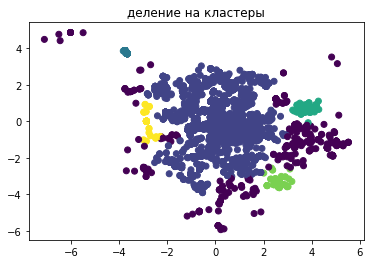

In [40]:
data = raw_data.iloc[:2*10**4, :]
print(data.head())
coords = data.iloc[:, 0:2]
coords_yes = data[data.comment_class==1].iloc[:, 0:2]
coords_no = data[data.comment_class==-1].iloc[:, 0:2]
print(data.shape)
print('размерность матрицы всех координат', coords.shape)
print('размерность матрицы проголосовавших ЗА', coords_yes.shape)
print('размерность матрицы проголосовавших ПРОТИВ',coords_no.shape)

X = scaler.fit_transform(coords)
X_yes = scaler.fit_transform(coords_yes)
X_no = scaler.fit_transform(coords_no)

clustering = DBSCAN(eps=0.03, min_samples=50).fit(coords)

#деление на кластеры, вывод рисунка
plt.title('деление на кластеры')
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.show()

           x          y  comment_class
0  37.612416  55.777454             -1
1  37.612416  55.777454             -1
2  37.603298  55.742108             -1
3  37.558526  55.728758             -1
4  37.566431  55.731794             -1
(20000, 3)
размерность матрицы всех координат (20000, 2)
размерность матрицы проголосовавших ЗА (2002, 2)
размерность матрицы проголосовавших ПРОТИВ (17998, 2)


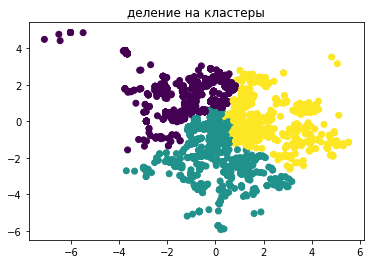

In [3]:
data = raw_data.iloc[:2*10**4, :]
print(data.head())
coords = data.iloc[:, 0:2]
coords_yes = data[data.comment_class==1].iloc[:, 0:2]
coords_no = data[data.comment_class==-1].iloc[:, 0:2]
print(data.shape)
print('размерность матрицы всех координат', coords.shape)
print('размерность матрицы проголосовавших ЗА', coords_yes.shape)
print('размерность матрицы проголосовавших ПРОТИВ',coords_no.shape)

X = scaler.fit_transform(coords)
X_yes = scaler.fit_transform(coords_yes)
X_no = scaler.fit_transform(coords_no)

clustering = AgglomerativeClustering(n_clusters=3).fit(coords)

#деление на кластеры, вывод рисунка
plt.title('деление на кластеры')
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.show()

(10000, 3)
размерность матрицы всех координат (10000, 2)
размерность матрицы проголосовавших ЗА (1115, 2)
размерность матрицы проголосовавших ПРОТИВ (8885, 2)


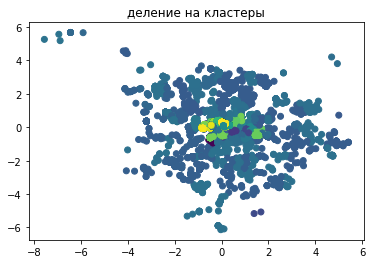

In [4]:
data = raw_data.iloc[:1*10**4, :]
coords = data.iloc[:, 0:2]
coords_yes = data[data.comment_class==1].iloc[:, 0:2]
coords_no = data[data.comment_class==-1].iloc[:, 0:2]
print(data.shape)
print('размерность матрицы всех координат', coords.shape)
print('размерность матрицы проголосовавших ЗА', coords_yes.shape)
print('размерность матрицы проголосовавших ПРОТИВ',coords_no.shape)

X = scaler.fit_transform(coords)
X_yes = scaler.fit_transform(coords_yes)
X_no = scaler.fit_transform(coords_no)

clustering = AffinityPropagation().fit(coords)

#деление на кластеры, вывод рисунка
plt.title('деление на кластеры')
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.show()